<a href="https://colab.research.google.com/github/onurercen/workout_prediction_app/blob/main/00_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gym Members – EDA Notebook

*Created: 2025-11-06*

In [ ]:
import pandas as pd
df = pd.read_csv(csv_path)
df.shape, df.head()


((973, 15),
    Age  Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
 0   56    Male         88.3        1.71      180      157           60   
 1   46  Female         74.9        1.53      179      151           66   
 2   32  Female         68.1        1.66      167      122           54   
 3   25    Male         53.2        1.70      190      164           56   
 4   38    Male         46.1        1.79      188      158           68   
 
    Session_Duration (hours)  Calories_Burned Workout_Type  Fat_Percentage  \
 0                      1.69           1313.0         Yoga            12.6   
 1                      1.30            883.0         HIIT            33.9   
 2                      1.11            677.0       Cardio            33.4   
 3                      0.59            532.0     Strength            28.8   
 4                      0.64            556.0     Strength            29.2   
 
    Water_Intake (liters)  Workout_Frequency (days/week)  Experien

In [ ]:
from pathlib import Path
csv_path = Path("/content/gym_members_exercise_tracking.csv")
print(csv_path.exists())


True


In [ ]:
import pandas as pd
df = pd.read_csv("/content/gym_members_exercise_tracking.csv")
df.head()



,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


In [ ]:
import os

for root, dirs, files in os.walk("/content"):
    for file in files:
        if file.lower().endswith(".csv"):
            print(os.path.join(root, file))



/content/gym_members_exercise_tracking.csv
/content/sample_data/mnist_test.csv
/content/sample_data/mnist_train_small.csv
/content/sample_data/california_housing_test.csv
/content/sample_data/california_housing_train.csv


In [ ]:
# /content altındaki tüm CSV'leri ve olası klasörleri listele
from pathlib import Path
for p in Path("/content").rglob("*.csv"):
    print(p)


/content/gym_members_exercise_tracking.csv
/content/sample_data/mnist_test.csv
/content/sample_data/mnist_train_small.csv
/content/sample_data/california_housing_test.csv
/content/sample_data/california_housing_train.csv


In [ ]:

# Basic imports
import os
import sys
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pathlib import Path
from collections import Counter

# ML imports
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report, confusion_matrix
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA

# Classifiers
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Utility
import warnings
warnings.filterwarnings("ignore")

plt.rcParams["figure.dpi"] = 120
plt.rcParams["figure.figsize"] = (6,4)  # Single-plot constraint per tool
print("Imports OK")


Imports OK


In [ ]:

# Try to locate the dataset CSV automatically. Update 'candidate_files' if needed.
project_dir = Path.cwd()
candidate_files = [
    "gym_members_exercise_dataset.csv",
    "Gym Members Exercise Dataset.csv",
    "gym_members_exercise_dataset.csv",
    "exercise_dataset.csv",
    # add more guesses here if necessary
]
csv_path = None
for name in candidate_files:
    p = project_dir / "gym_members_exercise_dataset.csv"
    if p.exists():
        csv_path = p
        break

if csv_path is None:
    print("❗ Dataset CSV not found. Please place the Kaggle CSV in this folder and set csv_path manually below.")
    csv_path = project_dir / "gym_members_exercise_dataset.csv"  # default expected name

print(f"Using CSV: {csv_path}")


❗ Dataset CSV not found. Please place the Kaggle CSV in this folder and set csv_path manually below.
Using CSV: /content/gym_members_exercise_dataset.csv


In [ ]:

# Load data
df = pd.read_csv(csv_path)
print(df.shape)
df.head()


FileNotFoundError: [Errno 2] No such file or directory: '/content/gym_members_exercise_dataset.csv'

## 1) Veri Özeti

In [ ]:

display(df.describe(include='all').T)
print("\nMissing values per column:")
print(df.isna().sum().sort_values(ascending=False))


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,973.0,NaN,NaN,NaN,38.683453,12.180928,18.0,28.0,40.0,49.0,59.0
Gender,973,2,Male,511,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Weight (kg),973.0,NaN,NaN,NaN,73.854676,21.2075,40.0,58.1,70.0,86.0,129.9
Height (m),973.0,NaN,NaN,NaN,1.72258,0.12772,1.5,1.62,1.71,1.8,2.0
Max_BPM,973.0,NaN,NaN,NaN,179.883864,11.525686,160.0,170.0,180.0,190.0,199.0
Avg_BPM,973.0,NaN,NaN,NaN,143.766701,14.345101,120.0,131.0,143.0,156.0,169.0
Resting_BPM,973.0,NaN,NaN,NaN,62.223022,7.32706,50.0,56.0,62.0,68.0,74.0
Session_Duration (hours),973.0,NaN,NaN,NaN,1.256423,0.343033,0.5,1.04,1.26,1.46,2.0
Calories_Burned,973.0,NaN,NaN,NaN,905.422405,272.641516,303.0,720.0,893.0,1076.0,1783.0
Workout_Type,973,4,Strength,258,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Missing values per column:
Age                              0
Gender                           0
Weight (kg)                      0
Height (m)                       0
Max_BPM                          0
Avg_BPM                          0
Resting_BPM                      0
Session_Duration (hours)         0
Calories_Burned                  0
Workout_Type                     0
Fat_Percentage                   0
Water_Intake (liters)            0
Workout_Frequency (days/week)    0
Experience_Level                 0
BMI                              0
dtype: int64


## 2) Tip Düzeltmeleri ve Türemiş Değişkenler

In [ ]:

# Standardize column names
df.columns = [c.strip().replace(' ', '_') for c in df.columns]

# Ensure BMI exists or compute (kg/m^2) if Weight, Height available
if 'BMI' not in df.columns and {'Weight_(kg)','Height_(m)'} <= set(df.columns):
    df['BMI'] = df['Weight_(kg)'] / (df['Height_(m)']**2)

# Example engineered features if base columns exist
if {'Calories_Burned','Session_Duration_(hours)'} <= set(df.columns):
    df['Calories_per_Hour'] = df['Calories_Burned'] / (df['Session_Duration_(hours)'].replace(0, np.nan))

if {'Max_BPM','Avg_BPM'} <= set(df.columns):
    df['BPM_Difference'] = df['Max_BPM'] - df['Avg_BPM']

print("Columns:", df.columns.tolist())
df.sample(5, random_state=42)


Columns: ['Age', 'Gender', 'Weight_(kg)', 'Height_(m)', 'Max_BPM', 'Avg_BPM', 'Resting_BPM', 'Session_Duration_(hours)', 'Calories_Burned', 'Workout_Type', 'Fat_Percentage', 'Water_Intake_(liters)', 'Workout_Frequency_(days/week)', 'Experience_Level', 'BMI', 'Calories_per_Hour', 'BPM_Difference']


,Age,Gender,Weight_(kg),Height_(m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration_(hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake_(liters),Workout_Frequency_(days/week),Experience_Level,BMI,Calories_per_Hour,BPM_Difference
199,34,Male,71.9,1.64,170,134,67,1.26,929.0,Cardio,21.3,2.1,4,2,26.73,737.301587,36
538,48,Male,83.9,1.82,176,149,70,1.90,1401.0,HIIT,13.1,3.5,5,3,25.33,737.368421,27
174,49,Male,79.2,1.72,194,128,69,1.46,925.0,Yoga,29.9,3.3,3,1,26.77,633.561644,66
464,30,Male,67.9,1.75,180,168,67,1.25,1155.0,Yoga,29.1,3.1,2,1,22.17,924.000000,12
66,32,Male,85.9,1.60,176,145,60,1.99,1587.0,HIIT,14.5,3.5,5,3,33.55,797.487437,31


## 3) Dağılımlar ve Basit İlişkiler

In [ ]:

numeric_cols = [c for c in df.select_dtypes(include=np.number).columns if c not in []]
cat_cols = [c for c in df.select_dtypes(exclude=np.number).columns if c not in []]
print("Numeric:", numeric_cols)
print("Categorical:", cat_cols)


Numeric: ['Age', 'Weight_(kg)', 'Height_(m)', 'Max_BPM', 'Avg_BPM', 'Resting_BPM', 'Session_Duration_(hours)', 'Calories_Burned', 'Fat_Percentage', 'Water_Intake_(liters)', 'Workout_Frequency_(days/week)', 'Experience_Level', 'BMI', 'Calories_per_Hour', 'BPM_Difference']
Categorical: ['Gender', 'Workout_Type']


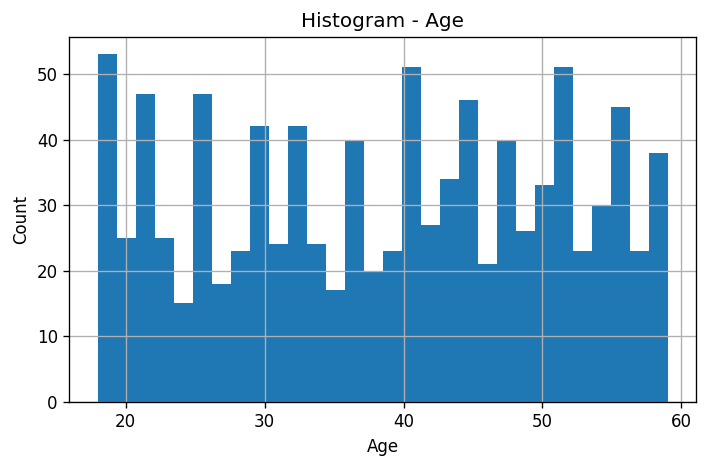

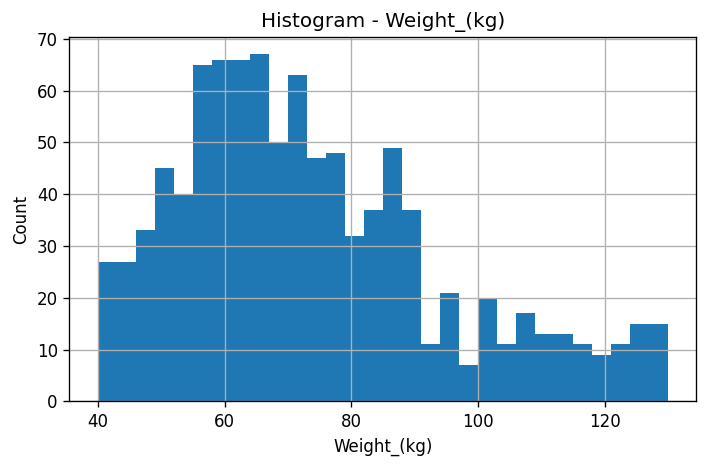

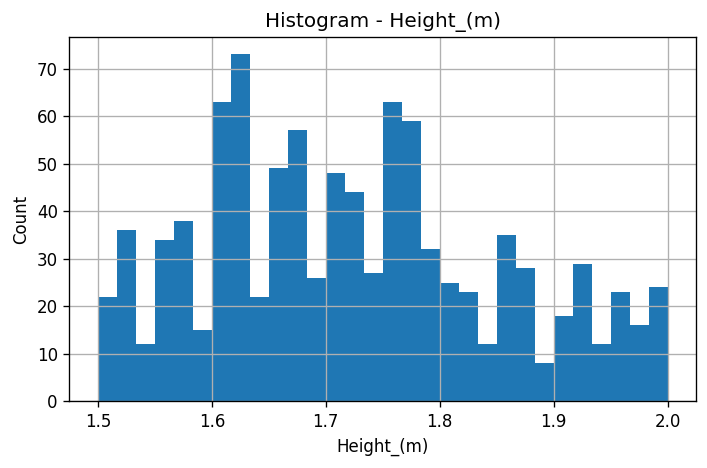

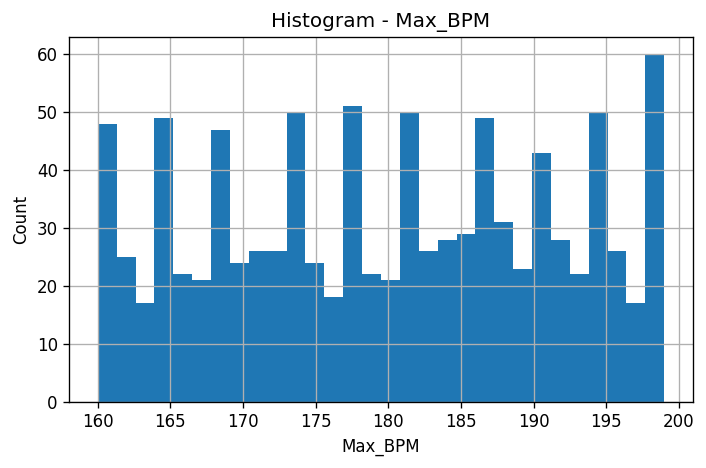

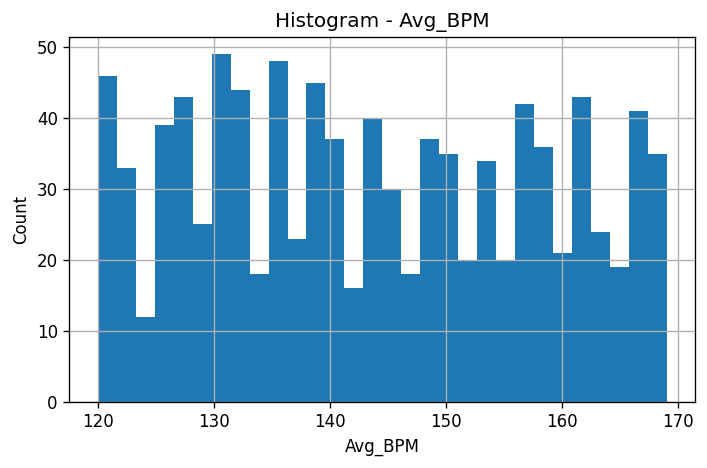

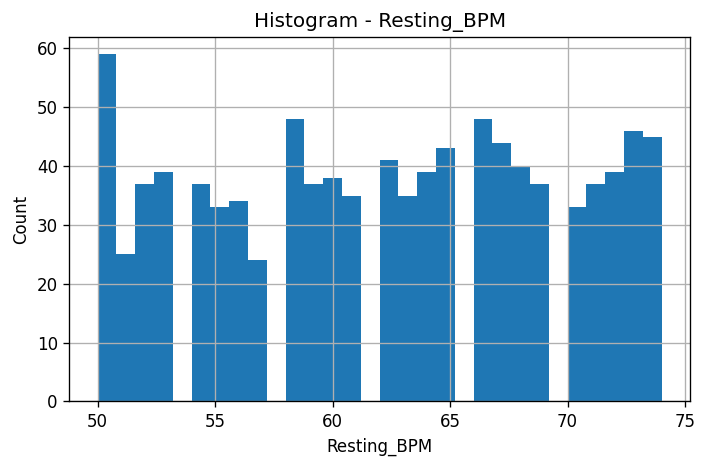

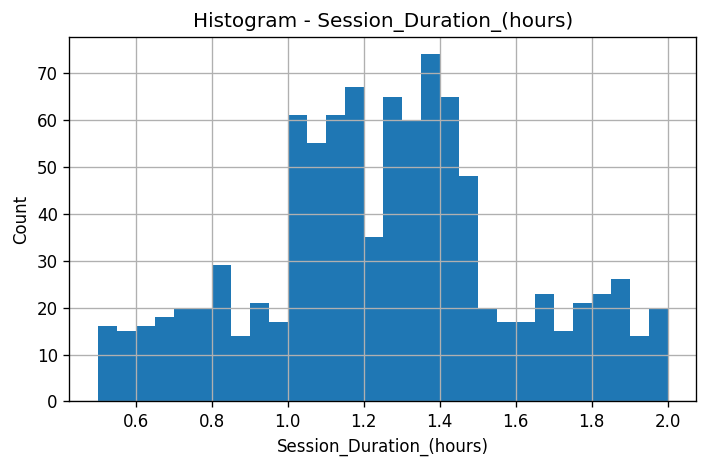

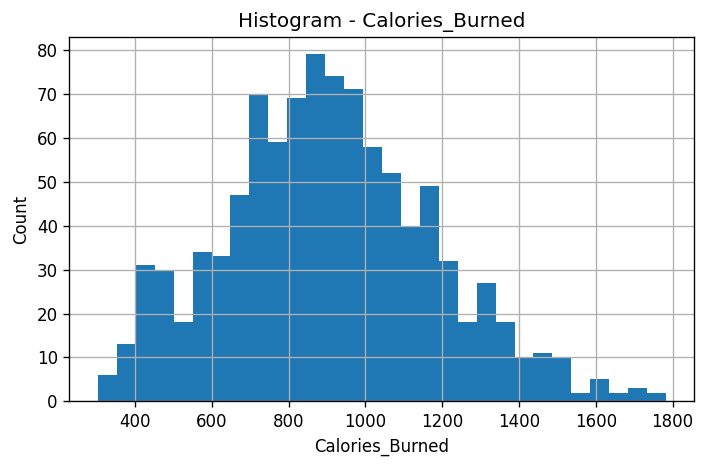

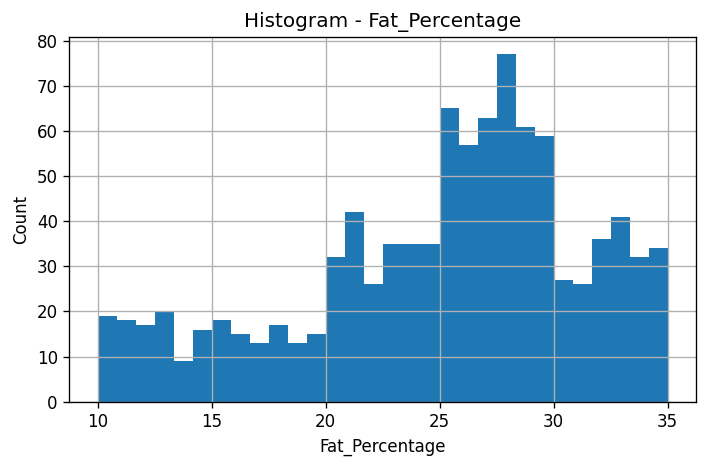

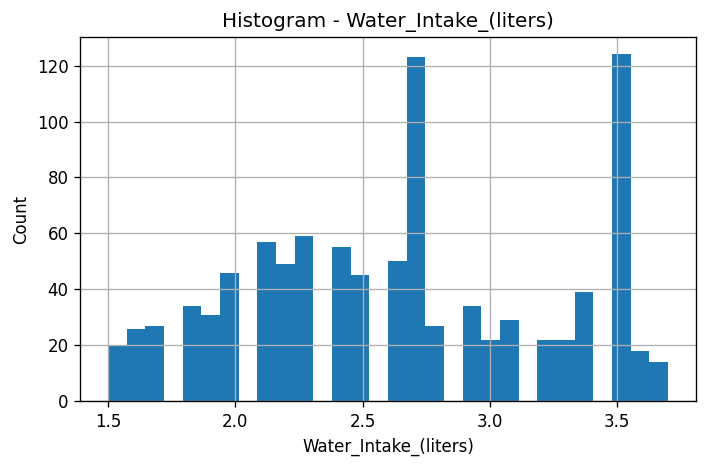

In [ ]:

# Histograms for numeric columns (one plot per figure per tool rules)
for col in numeric_cols[:10]:  # cap for speed
    plt.figure()
    df[col].dropna().hist(bins=30)
    plt.title(f"Histogram - {col}")
    plt.xlabel(col); plt.ylabel("Count")
    plt.tight_layout()
    plt.show()


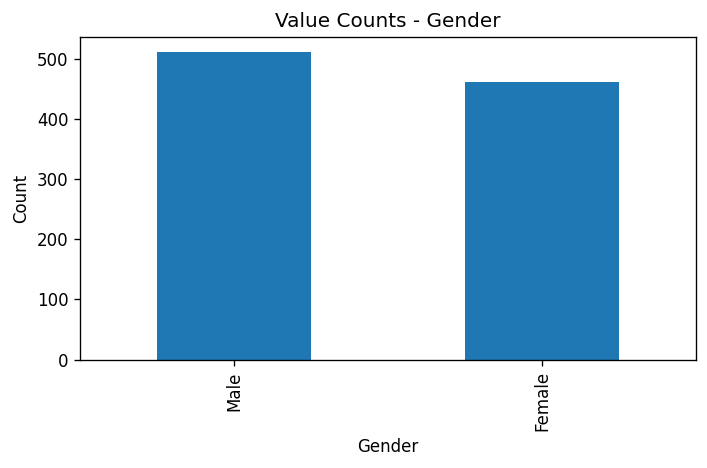

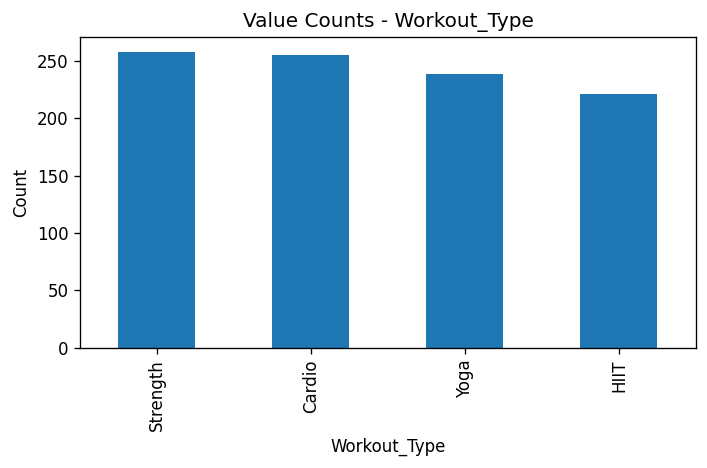

In [ ]:

# Bar plots for categorical columns (top categories)
for col in cat_cols[:8]:
    plt.figure()
    df[col].value_counts().head(20).plot(kind='bar')
    plt.title(f"Value Counts - {col}")
    plt.xlabel(col); plt.ylabel("Count")
    plt.tight_layout()
    plt.show()


## 4) Korelasyon Analizi

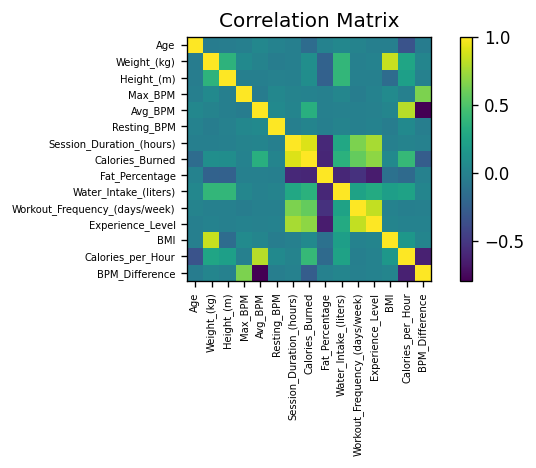

Top correlation pairs:
Calories_Burned                Session_Duration_(hours)         0.908140
Session_Duration_(hours)       Calories_Burned                  0.908140
Weight_(kg)                    BMI                              0.853158
BMI                            Weight_(kg)                      0.853158
Workout_Frequency_(days/week)  Experience_Level                 0.837079
Experience_Level               Workout_Frequency_(days/week)    0.837079
Calories_per_Hour              Avg_BPM                          0.810482
Avg_BPM                        Calories_per_Hour                0.810482
                               BPM_Difference                   0.789277
BPM_Difference                 Avg_BPM                          0.789277
Session_Duration_(hours)       Experience_Level                 0.764768
Experience_Level               Session_Duration_(hours)         0.764768
                               Calories_Burned                  0.694129
Calories_Burned             

In [ ]:

# Simple correlation heatmap using matplotlib (no seaborn)
corr = df[numeric_cols].corr(numeric_only=True)
fig, ax = plt.subplots()
cax = ax.imshow(corr, interpolation='nearest')
ax.set_title('Correlation Matrix')
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90, fontsize=6)
plt.yticks(range(len(corr.columns)), corr.columns, fontsize=6)
fig.colorbar(cax)
plt.tight_layout()
plt.show()

# Show most correlated pairs
corr_unstack = corr.where(~np.eye(corr.shape[0],dtype=bool))
pairs = corr_unstack.unstack().dropna().abs().sort_values(ascending=False)
print("Top correlation pairs:")
print(pairs.groupby(level=0).head(3).head(20))


## 5) Kümelenme (KMeans & DBSCAN) – EDA Amaçlı

KMeans k=3 -> cluster counts: Counter({np.int32(2): 417, np.int32(0): 365, np.int32(1): 191})
KMeans k=4 -> cluster counts: Counter({np.int32(1): 304, np.int32(2): 268, np.int32(0): 208, np.int32(3): 193})
KMeans k=5 -> cluster counts: Counter({np.int32(4): 304, np.int32(1): 263, np.int32(3): 205, np.int32(2): 107, np.int32(0): 94})


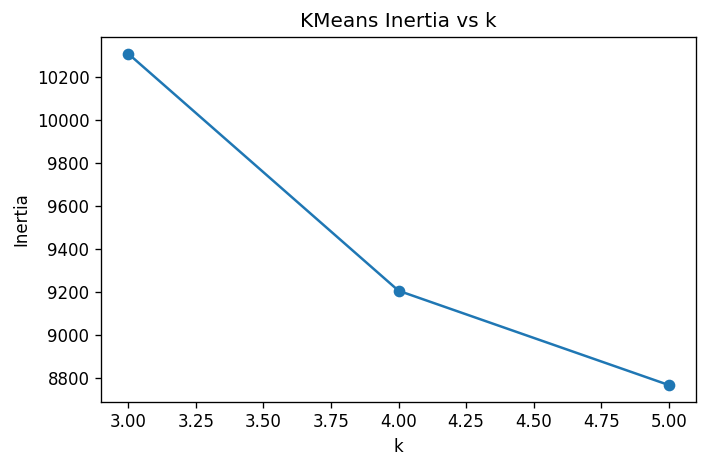

DBSCAN labels (first 20): [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
DBSCAN clusters: Counter({np.int64(-1): 973})  (-1 means noise)


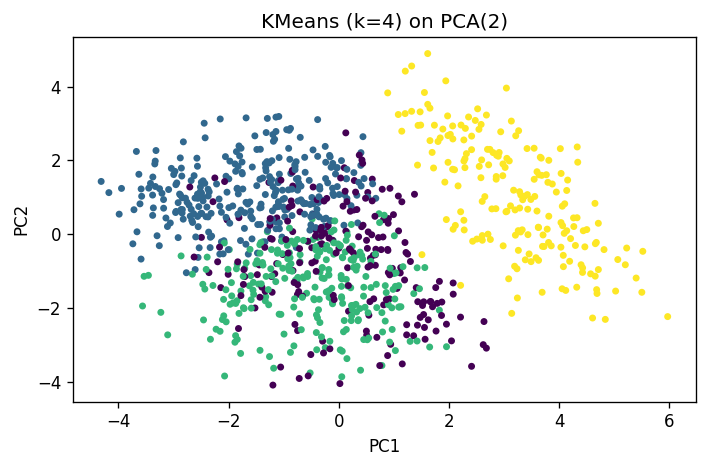

In [ ]:

# Choose a feature set for clustering (adjust as needed)
cluster_features = [c for c in numeric_cols if c not in []]
Xc = df[cluster_features].copy()

# Impute + scale
from sklearn.pipeline import make_pipeline
clust_pipe = make_pipeline(SimpleImputer(strategy='median'), StandardScaler())
Xc_t = clust_pipe.fit_transform(Xc)

# KMeans with k in {3,4,5}
ks = [3,4,5]
inertia_values = []
for k in ks:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(Xc_t)
    inertia_values.append(km.inertia_)
    labels = km.labels_
    print(f"KMeans k={k} -> cluster counts: {Counter(labels)}")

plt.figure()
plt.plot(ks, inertia_values, marker='o')
plt.title("KMeans Inertia vs k")
plt.xlabel("k"); plt.ylabel("Inertia")
plt.tight_layout()
plt.show()

# DBSCAN (simple try)
db = DBSCAN(eps=1.5, min_samples=10).fit(Xc_t)
db_labels = db.labels_
print(f"DBSCAN labels (first 20): {db_labels[:20]}")
print(f"DBSCAN clusters: {Counter(db_labels)}  (-1 means noise)")

# PCA for 2D visualization
pca = PCA(n_components=2, random_state=42)
X2 = pca.fit_transform(Xc_t)

# Plot KMeans(k=4) clusters
km = KMeans(n_clusters=4, random_state=42, n_init=10).fit(Xc_t)
lbl = km.labels_
plt.figure()
plt.scatter(X2[:,0], X2[:,1], c=lbl, s=10)
plt.title("KMeans (k=4) on PCA(2)")
plt.xlabel("PC1"); plt.ylabel("PC2")
plt.tight_layout()
plt.show()


## 6) Çıktıların Kaydedilmesi

In [ ]:

outdir = Path("outputs")
outdir.mkdir(exist_ok=True)
df.to_csv(outdir / "cleaned_dataset.csv", index=False)
print("Saved cleaned dataset to outputs/cleaned_dataset.csv")


Saved cleaned dataset to outputs/cleaned_dataset.csv
